In [1]:
!pip install fastai
!pip install torch


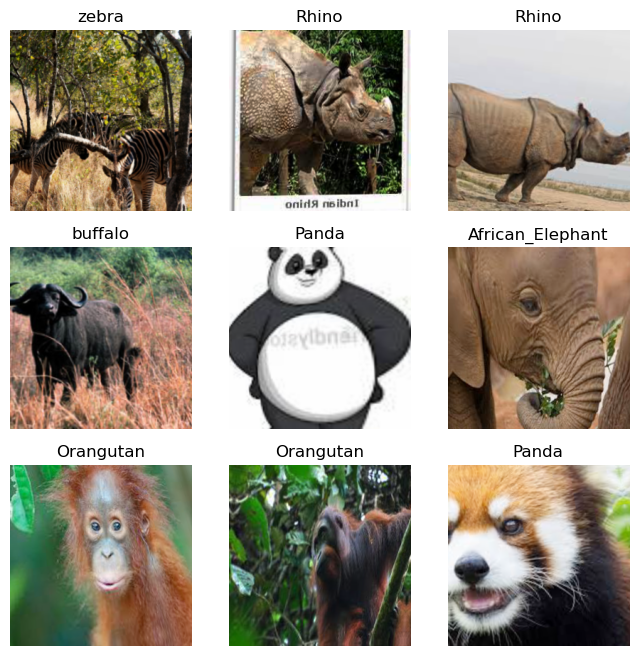

In [3]:
from fastai.vision.all import *
import shutil

# Update the paths to the actual locations of your datasets
path_extinction = Path(r'C:\Users\DELL\Desktop\endangered specie\Danger Of Extinction')
path_wildlife = Path(r'C:\Users\DELL\Desktop\african-wildlife')

# Combine datasets into a single directory
combined_path = Path('C:/path/to/combined_wildlife')
combined_path.mkdir(exist_ok=True, parents=True)

# Copy images from both datasets into the combined directory
for path in [path_extinction, path_wildlife]:
    for folder in path.ls():
        dest = combined_path/folder.name
        dest.mkdir(exist_ok=True, parents=True)
        for file in folder.ls():
            shutil.copy(file, dest)

# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = dblock.dataloaders(combined_path, bs=64)
dls.show_batch(max_n=9, figsize=(8,8))


epoch,train_loss,valid_loss,error_rate,time
0,0.808812,0.217595,0.061991,04:36


epoch,train_loss,valid_loss,error_rate,time
0,0.287276,0.222592,0.060113,04:56
1,0.220687,0.123192,0.035692,04:23
2,0.149019,0.143521,0.038197,04:59
3,0.086483,0.112751,0.031935,03:35


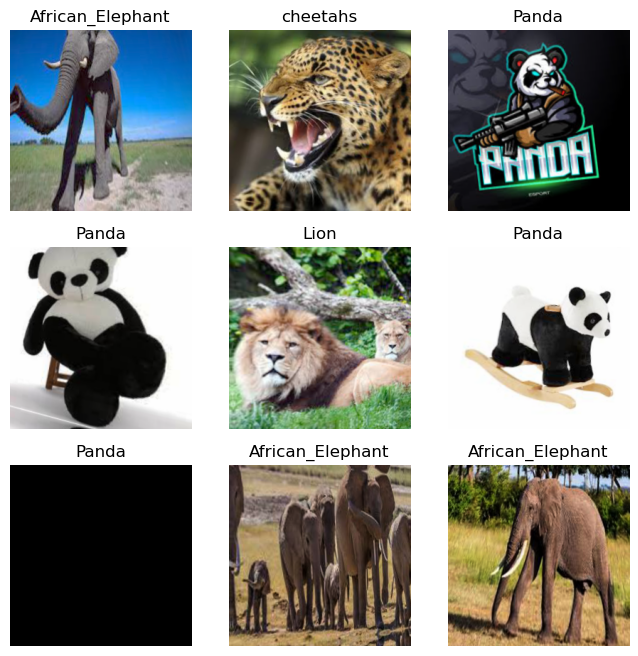

In [6]:
from fastai.vision.all import *
import shutil
import torch

# Update the paths to the actual locations of your datasets
path_extinction = Path(r'C:\Users\DELL\Desktop\endangered specie\Danger Of Extinction')
path_wildlife = Path(r'C:\Users\DELL\Desktop\african-wildlife')
# Combine datasets into a single directory
combined_path = Path('C:/path/to/combined_wildlife')
combined_path.mkdir(exist_ok=True, parents=True)

# Copy images from both datasets into the combined directory
for path in [path_extinction, path_wildlife]:
    for folder in path.ls():
        dest = combined_path/folder.name
        dest.mkdir(exist_ok=True, parents=True)
        for file in folder.ls():
            shutil.copy(file, dest)

# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = dblock.dataloaders(combined_path, bs=64)

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move DataLoaders to the appropriate device
dls.to(device)

# Show batch of images
dls.show_batch(max_n=9, figsize=(8,8))

# Define and train a model
learn = vision_learner(dls, resnet34, metrics=error_rate)

# Move learner to the appropriate device
learn.model.to(device)

# Train the model
learn.fine_tune(4)


In [4]:
import torch
from torch import nn

# Generator
class GANGenerator(nn.Module):
    def __init__(self, z_dim=100, img_dim=3*256*256):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, img_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x).view(-1, 3, 256, 256)

# Discriminator
class GANDiscriminator(nn.Module):
    def __init__(self, img_dim=3*256*256):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 512),
            nn.ReLU(True),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x.view(x.size(0), -1))

# Initialize models
generator = GANGenerator()
discriminator = GANDiscriminator()


In [8]:
!pip install fastai
!pip install git+https://github.com/rosinality/stylegan2-pytorch.git


  Cloning https://github.com/rosinality/stylegan2-pytorch.git to c:\users\dell\appdata\local\temp\pip-req-build-m2q17813


  Running command git clone --filter=blob:none --quiet https://github.com/rosinality/stylegan2-pytorch.git 'C:\Users\DELL\AppData\Local\Temp\pip-req-build-m2q17813'
  error: RPC failed; curl 92 HTTP/2 stream 3 was not closed cleanly: CANCEL (err 8)
  error: 4586 bytes of body are still expected
  fetch-pack: unexpected disconnect while reading sideband packet
  fatal: early EOF
  fatal: index-pack failed
  fatal: could not fetch b8e449f3ff8a4951e8122cefa463ce506b590246 from promisor remote
  You can inspect what was checked out with 'git status'
  and retry with 'git restore --source=HEAD :/'

  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/rosinality/stylegan2-pytorch.git 'C:\Users\DELL\AppData\Local\Temp\pip-req-build-m2q17813' did not run successfully.
  exit code: 128
  
  See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git clone --

ModuleNotFoundError: No module named 'stylegan2_pytorch'

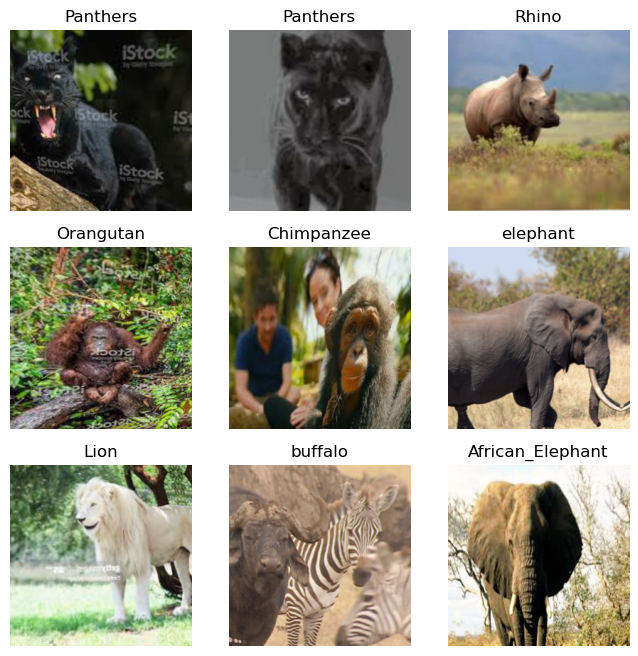

In [9]:
from fastai.vision.all import *
import torch
import requests
from pathlib import Path
import shutil

# Define paths
combined_path = Path('C:/path/to/combined_wildlife')

# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = dblock.dataloaders(combined_path, bs=64)

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move DataLoaders to the appropriate device
dls.to(device)

# Show batch of images
dls.show_batch(max_n=9, figsize=(8,8))

# Define and train a GAN model
# Import the necessary modules for StyleGAN2-ADA
from stylegan2_pytorch import ModelLoader

# Load the pre-trained StyleGAN2-ADA model
model = ModelLoader(
    model_path='path/to/pretrained/ffhq-256.pkl', # replace with the path to your pre-trained model
    use_gpu=True
)

# Generate new images
def generate_images(model, num_images=10, truncation=0.7, save_path='generated_images'):
    save_path = Path(save_path)
    save_path.mkdir(exist_ok=True)
    for i in range(num_images):
        img = model.generate(truncation=truncation)
        img.save(save_path/f'generated_image_{i}.png')

generate_images(model, num_images=10)


In [10]:
!pip install fastai
!pip install git+https://github.com/NVlabs/stylegan2-ada-pytorch.git


  Cloning https://github.com/NVlabs/stylegan2-ada-pytorch.git to c:\users\dell\appdata\local\temp\pip-req-build-p4u_v0ka
  Resolved https://github.com/NVlabs/stylegan2-ada-pytorch.git to commit d72cc7d041b42ec8e806021a205ed9349f87c6a4


  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/stylegan2-ada-pytorch.git 'C:\Users\DELL\AppData\Local\Temp\pip-req-build-p4u_v0ka'
ERROR: git+https://github.com/NVlabs/stylegan2-ada-pytorch.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [13]:
!git clone https://github.com/NVlabs/stylegan2.git
%cd stylegan2
!pip install -e .


C:\Users\DELL\Desktop\deep learning\stylegan2


Cloning into 'stylegan2'...


Obtaining file:///C:/Users/DELL/Desktop/deep%20learning/stylegan2


ERROR: file:///C:/Users/DELL/Desktop/deep%20learning/stylegan2 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [11]:
from fastai.vision.all import *
import torch
from pathlib import Path
import dnnlib
import legacy

# Define paths
combined_path = Path('C:/path/to/combined_wildlife')

# Create a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = dblock.dataloaders(combined_path, bs=64)

# Show batch of images
dls.show_batch(max_n=9, figsize=(8,8))

# Set up StyleGAN2-ADA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained StyleGAN2-ADA model
network_pkl = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq-256.pkl'
print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # type: ignore

# Function to generate images
def generate_images(G, num_images=10, truncation=0.7, save_path='generated_images'):
    save_path = Path(save_path)
    save_path.mkdir(exist_ok=True)
    for i in range(num_images):
        z = torch.randn(1, G.z_dim).to(device)
        c = None
        img = G(z, c, truncation_psi=truncation)
        img = (img + 1) * (255/2)
        img = img.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
        PIL.Image.fromarray(img, 'RGB').save(save_path/f'generated_image_{i}.png')

generate_images(G, num_images=10)


ModuleNotFoundError: No module named 'dnnlib'